# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import optuna

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

from category_encoders import TargetEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here

df = pd.read_csv('Dataset_clustering.csv')
df.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price,clusters
0,B2C,2.05,2,0.0,4.10,1
1,B2B,2.77,85,0.1,211.90,0
2,B2C,4.19,9,0.0,37.71,1
3,B2C,1.49,12,0.0,17.88,1
4,B2C,109.19,3,0.0,327.57,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
#Type your code here
X = df.drop(columns='clusters')
y = df['clusters']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
column_transformer = ColumnTransformer([
    ('Cat Encoder', TargetEncoder(), make_column_selector(dtype_exclude=np.number))
], remainder='passthrough')

rf_pipeline = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('Preprocessor', column_transformer),
    ('Model', XGBClassifier(random_state=42))
])

In [5]:
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cat Encoder',
                                                  TargetEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000286FE1ED460>)])),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
#Type your code here
print('RF MODEL')
print(classification_report(y_test, rf_pipeline.predict(X_test)))
print()

print('XGB MODEL')
print(classification_report(y_test, xgb_pipeline.predict(X_test)))

RF MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00      1271
           2       0.98      0.94      0.96        50

    accuracy                           1.00      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


XGB MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00      1271
           2       0.98      0.96      0.97        50

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



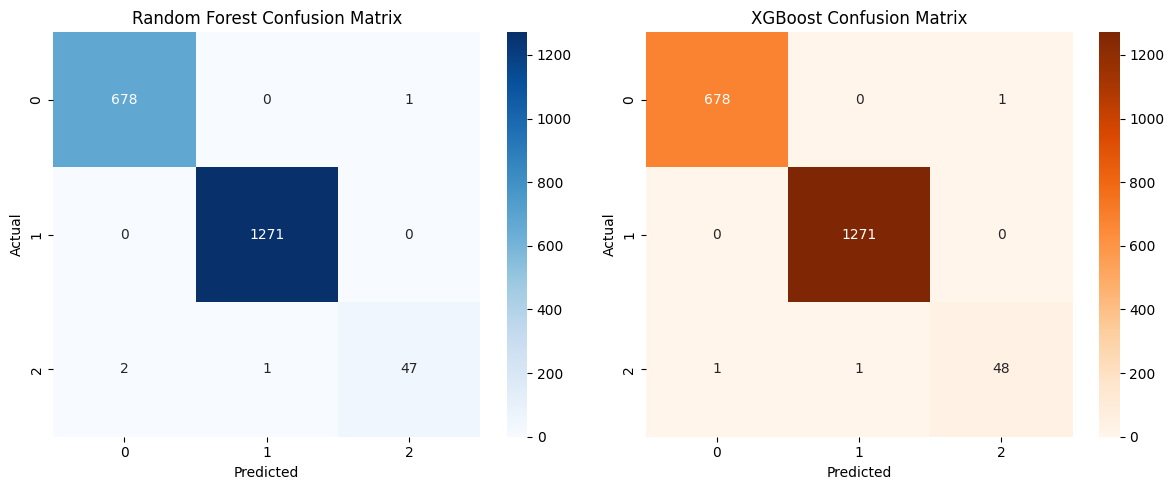

In [10]:
# Generate predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Create subplots
plt.figure(figsize=(12, 5))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# XGBoost Confusion Matrix
plt.subplot(1, 2, 2)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [8]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.